<a href="https://colab.research.google.com/github/davrodrod/algoritmosIA/blob/master/SCA_Act1Parte2_DavidRodriguezRodrigo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Obtención-de-los-datos-y-pre-processing" data-toc-modified-id="Obtención-de-los-datos-y-pre-processing-0.0.1"><span class="toc-item-num">0.0.1&nbsp;&nbsp;</span>Obtención de los datos y pre-processing</a></span></li></ul></li></ul></li><li><span><a href="#Consideraciones-iniciales" data-toc-modified-id="Consideraciones-iniciales-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Consideraciones iniciales</a></span><ul class="toc-item"><li><span><a href="#Train-validation-test-split" data-toc-modified-id="Train-validation-test-split-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Train-validation-test split</a></span></li><li><span><a href="#Un-error-común-con-modelos-de-Keras" data-toc-modified-id="Un-error-común-con-modelos-de-Keras-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Un error común con modelos de Keras</a></span></li><li><span><a href="#Análisis-de-resultados" data-toc-modified-id="Análisis-de-resultados-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Análisis de resultados</a></span></li></ul></li><li><span><a href="#1.-Unidades-de-activación" data-toc-modified-id="1.-Unidades-de-activación-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>1. Unidades de activación</a></span></li><li><span><a href="#2.-Inicialización-de-parámetros" data-toc-modified-id="2.-Inicialización-de-parámetros-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>2. Inicialización de parámetros</a></span></li><li><span><a href="#3.-Optimizadores" data-toc-modified-id="3.-Optimizadores-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>3. Optimizadores</a></span></li><li><span><a href="#4.-Regularización-y-red-final-(1.25-puntos)" data-toc-modified-id="4.-Regularización-y-red-final-(1.25-puntos)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>4. Regularización y red final <em>(1.25 puntos)</em></a></span><ul class="toc-item"><li><span><a href="#Evaluación-del-modelo-en-datos-de-test" data-toc-modified-id="Evaluación-del-modelo-en-datos-de-test-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Evaluación del modelo en datos de test</a></span></li></ul></li></ul></div>

# Segunda parte: Aspectos prácticos de las redes neuronales

En esta segunda parte, vamos a continuar desarrollando el problema de Fashion MNIST, con el objetivo de entender los aspectos prácticos del entrenamiento de redes neuronales que hemos visto en el Tema 4.

El código utilizado para contestar tiene que quedar claramente reflejado en el Notebook. Puedes crear nuevas cells si así lo deseas para estructurar tu código y sus salidas. A la hora de entregar el notebook, **asegúrate de que los resultados de ejecutar tu código han quedado guardados**. 

In [ ]:
# Puedes añadir todos los imports adicionales que necesites aquí
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Dropout
from keras.layers import BatchNormalization, Activation
import tensorflow as tf

import matplotlib
import matplotlib.pyplot as plt

!pip install keras-tuner
import kerastuner as kt
import IPython
from keras import regularizers

#### Obtención de los datos y pre-processing

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

## Consideraciones iniciales

### Train-validation-test split

En todos los modelos que entrenemos, vamos a partir los datos de training (x_train) en dos sets: training y validación. De este modo, al final tendremos tres datasets distintos: training, validation, y test. Esta es una estrategia común en el aprendizaje automático, en la que los datos de test (o held-out data) se 
"esconden" hasta el final. Los datos de validación se utilizan para estimar cómo de bien están funcionando nuestros modelos y para observar si estamos cayendo en overfitting. Esto nos permite cambiar hiperparámetros y probar distintas arquitecturas **sabiendo que no estamos utilizando información del test set para "optimizar" los resultados en éste** (si eligiéramos nuestro mejor modelo en base a los resultados de test, estaríamos "haciendo trampas", ya que se ha utilizado la información contenida en éste para elegir el modelo y las métricas reportadas serían optimistas).

Para utilizar un split training-validation data durante el entrenamiento, podemos partir nosotros mismos los datos o dejar que Keras lo haga. Podéis ver cómo hacer estas particiones en la documentación de *fit*.

**Requisito: En todos los entrenamientos de esta práctica, se requiere utilizar el 20% de los datos en x_train como  conjunto de datos de validación**

### Un error común con modelos de Keras

En esta práctica entrenaremos varios modelos para comparar resultados. Un error común en Keras es no instanciar un nuevo modelo cada vez que hacemos un nuevo entrenamiento. Al hacer

*model = Sequential()*

*model.add(lo que sea)  # Definición del modelo*

*model.fit()*

si queremos entrenar un nuevo modelo o el mismo modelo otra vez, es necesario volver a inicializar el modelo con model = Sequential(). Si olvidamos este paso y volvemos a hacer fit(), el modelo seguirá entrenando por donde se quedó en el último fit().

### Análisis de resultados 

A la hora de escribir las respuestas y los análisis pedidos, es importante presentar las conclusiones de manera adecuada a partir de lo visto en nuestros experimentos. Los Jupyter Notebook son una herramienta imprescindible para *data scientists* e ingenieros de Machine Learning para presentar los resultados, incluyendo soporte para incluir gráficas y elementos visuales. Podéis explicar vuestras observaciones del modo que consideréis adecuado, si bien recomendamos la utilización de gráficas para evaluar los entrenamientos y comparar resultados.

Como ayuda, las siguientes funciones pueden resultar interesantes a la hora de evaluar resultados. Todas ellas utilizan el objeto *history* que podéis obtener como salida del método *fit()* de Keras:

history = model.fit(x_train, y_train, ...)

Por supuesto, podéis modificarlas y utilizarlas como prefiráis para crear vuestros propios informes.

> En este punto se crean un par de funciones que permiten comparar hasta 5 modelos de manera simultánea

In [ ]:
def plot_acc(history, title="Model Accuracy"):
    """Imprime una gráfica mostrando la accuracy por epoch obtenida en un entrenamiento"""
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()
    
def plot_loss(history, title="Model Loss"):
    """Imprime una gráfica mostrando la pérdida por epoch obtenida en un entrenamiento"""
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper right')
    plt.show()
    
def plot_compare_losses(history1, history2, name1="Red 1",
                        name2="Red 2", title="Graph title"):
    """Compara losses de dos entrenamientos con nombres name1 y name2"""
    plt.plot(history1.history['loss'], color="green")
    plt.plot(history1.history['val_loss'], 'r--', color="green")
    plt.plot(history2.history['loss'], color="blue")
    plt.plot(history2.history['val_loss'], 'r--', color="blue")
    plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train ' + name1, 'Val ' + name1, 
                'Train ' + name2, 'Val ' + name2],
               loc='upper right')
    plt.show()
    
def plot_compare_accs(history1, history2, name1="Red 1",
                      name2="Red 2", title="Graph title"):
    """Compara accuracies de dos entrenamientos con nombres name1 y name2"""
    plt.plot(history1.history['accuracy'], color="green")
    plt.plot(history1.history['val_accuracy'], 'r--', color="green")
    plt.plot(history2.history['accuracy'], color="blue")
    plt.plot(history2.history['val_accuracy'], 'r--', color="blue")
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train ' + name1, 'Val ' + name1, 
                'Train ' + name2, 'Val ' + name2], 
               loc='lower right')
    plt.show()

# Se crea está función para comparar losses en hasta 5 modelos diferentes
def plot_compare_multiple_losses(history, name, title="Graph title"):
    """Compara losses de hasta 5 entrenamientos"""
    color = ["green", "blue", "red", "orange", "yellow"]
    legend = []
    for i in range(0,min(len(history),5)):
      plt.plot(history[i].history['loss'], color=color[i])
      plt.plot(history[i].history['val_loss'], 'r--', color=color[i])
      legend.append('Train ' + name[i])
      legend.append('Val ' + name[i])

    plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(legend,
               loc='upper right')
    plt.show()

# Se crea está función para comparar accuracies en hasta 5 modelos diferentes
def plot_compare_multiple_accs(history, name, title="Graph title"):
    """Compara losses de hasta 5 entrenamientos"""
    color = ["green", "blue", "red", "orange", "yellow"]
    legend = []
    for i in range(0,min(len(history),5)):
      plt.plot(history[i].history['accuracy'], color=color[i])
      plt.plot(history[i].history['val_accuracy'], 'r--', color=color[i])
      legend.append('Train ' + name[i])
      legend.append('Val ' + name[i])

    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(legend,
               loc='lower right')
    plt.show()
    
# Nota: podéis cambiar los números aquí presentes y ejecutar esta línea si queréis cambiar el tamaño
# de las gráficas
# matplotlib.rcParams['figure.figsize'] = [8, 8]


## 1. Unidades de activación

En este ejercicio, vamos a evaluar la importancia de utilizar las unidades de activación adecuadas. Como hemos visto en clase, funciones de activación como sigmoid han dejado de utilizarse en favor de otras unidades como ReLU.

**Ejercicio 1 *(1.25 puntos)***: Partiendo de una red sencilla como la desarrollada en el Trabajo 1, escribir un breve análisis comparando la utilización de unidades sigmoid y ReLU (por ejemplo, se pueden comentar aspectos como velocidad de convergencia, métricas obtenidas...). Explicar por qué pueden darse estas diferencias. Opcionalmente, comparar con otras activaciones disponibles en Keras.

*Pista: Usando redes más grandes se hace más sencillo apreciar las diferencias. Es mejor utilizar al menos 3 o 4 capas densas.*

In [ ]:
# Se crea una función para construiur el modelo que acepte como parámetro
# el tipo de unidad de activación a emplear
def modelo_activacion(activacion):
  model = keras.Sequential()
  model.add(Flatten())
  model.add(Dense(128,activation=activacion))
  model.add(Dense(128,activation=activacion))
  model.add(Dense(128,activation=activacion))
  model.add(Dense(64,activation=activacion))
  model.add(Dense(10, activation='softmax'))

  model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])  # what to track
  return model

# Se entrena con unidad de activación sigmoid
# Se reserva el 20% de las muestras para validación
print("Entrenamiento con unidad de activación sigmoid:")
modelo_sigmoid = modelo_activacion('sigmoid')
history_sigmoid=modelo_sigmoid.fit(x_train,
                                   y_train,
                                   validation_split=0.2,
                                   batch_size=128,
                                   epochs=5)
# Se entrena con unidad de activación relu
# Se reserva el 20% de las muestras para validación
print("\nEntrenamiento con unidad de activación relu:")
modelo_relu = modelo_activacion('relu')
history_relu=modelo_relu.fit(x_train,
                             y_train,
                             validation_split=0.2,
                             batch_size=128,
                             epochs=5)
# Se entrena con unidad de activación tanh
# Se reserva el 20% de las muestras para validación
print("\nEntrenamiento con unidad de activación tanh:")
modelo_tanh= modelo_activacion('tanh')
history_tanh=modelo_tanh.fit(x_train,
                             y_train,
                             validation_split=0.2,
                             batch_size=128,
                             epochs=5)
# Se entrena con unidad de activación leaky relu
# Se reserva el 20% de las muestras para validación
print("\nEntrenamiento con unidad de activación leaky relu:")
modelo_leakyRelu = modelo_activacion(keras.layers.LeakyReLU(alpha=0.3))
history_leakyRelu=modelo_leakyRelu.fit(x_train,
                                       y_train,
                                       validation_split=0.2,
                                       batch_size=128,
                                       epochs=5)

Entrenamiento con unidad de activación sigmoid:
Epoch 1/5
375/375 [==============================] - 2s 5ms/step - loss: 2.3196 - accuracy: 0.0957 - val_loss: 2.3034 - val_accuracy: 0.0957
Epoch 2/5
375/375 [==============================] - 2s 5ms/step - loss: 2.3031 - accuracy: 0.0971 - val_loss: 2.3029 - val_accuracy: 0.1353
Epoch 3/5
375/375 [==============================] - 2s 5ms/step - loss: 2.3026 - accuracy: 0.1035 - val_loss: 2.3028 - val_accuracy: 0.0957
Epoch 4/5
375/375 [==============================] - 2s 5ms/step - loss: 2.3024 - accuracy: 0.1071 - val_loss: 2.3022 - val_accuracy: 0.0958
Epoch 5/5
375/375 [==============================] - 2s 5ms/step - loss: 2.3020 - accuracy: 0.1047 - val_loss: 2.3021 - val_accuracy: 0.0995

Entrenamiento con unidad de activación relu:
Epoch 1/5
375/375 [==============================] - 2s 5ms/step - loss: 1.3763 - accuracy: 0.5414 - val_loss: 0.8299 - val_accuracy: 0.6972
Epoch 2/5
375/375 [==============================] - 2s 5ms/

> Se hace una comparativa entre el rendimiento utilizando unidades de activación sigmoid y relu

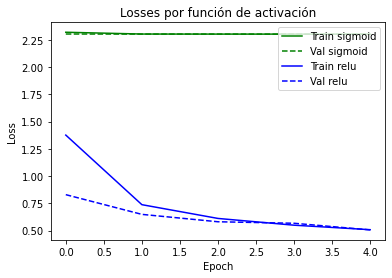

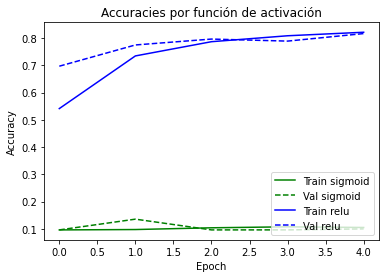

In [ ]:
plot_compare_multiple_losses([history_sigmoid, history_relu],
                             name=['sigmoid','relu'],
                             title="Losses por función de activación")

plot_compare_multiple_accs([history_sigmoid, history_relu,],
                             name=['sigmoid','relu'],
                           title="Accuracies por función de activación")

> En la comparativa entre activación sigmoid y activación relu, tanto en accuracy como en loss, el comportamiento del relu es siempre claramente superior al sigmoid. Al poner 4 capas ocultas, se comprueba que el rendimiento del sigmoid desciende mucho. Utilizando menos capas, puede apreciarse que, mientras la convergencia utilizando sigmoid es muy gradual, con relu es bastante rápida produciéndose en las primeras epochs. Las epochs posteriores usando relu apenas aportan mejora, por lo que podría pararse el entrenamiento por ejemplo con 5 epochs.
>
>Las diferencias se deben a que la activación sigmoid presenta principalmente dos problemas. El primero es que para entradas cercanas a 1 o -1 la derivada es cercana a 0, anulando el gradiente y dificultando el aprendizaje, y la segunda es que su salida no está centrada en 0, sino que siempre es positiva lo que hace que las siguientes capas siempre reciban valores positivos y la derivada con respecto a los pesos siempre tiene el mismo o, dificultando igualmente el aprendizaje.
>
>
> A continuación se comparan los resultados obtenidos utilizando las unidades de activación relu, tanh y leaky relu


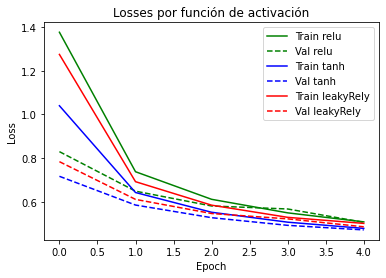

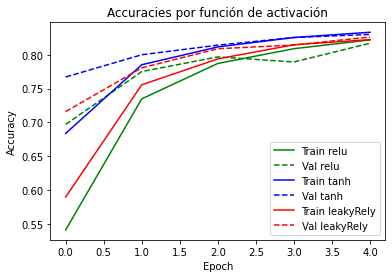

In [ ]:
plot_compare_multiple_losses([history_relu, history_tanh, history_leakyRelu],
                             name=['relu','tanh', 'leakyRely'],
                             title="Losses por función de activación")

plot_compare_multiple_accs([history_relu, history_tanh, history_leakyRelu],
                           name=['relu','tanh', 'leakyRely'],
                           title="Accuracies por función de activación")

>Los resultados obtenidos son bastante parecidos al caso de utilización de activación relu. Sin embargo, parece que relu ofrece resultados un poco superiores a los otros

## 2. Inicialización de parámetros

En este ejercicio, vamos a evaluar la importancia de una correcta inicialización de parámetros en una red neuronal.

**Ejercicio 2 *(1.25 puntos)***: Partiendo de una red similar a la del ejercicio anterior (usando ya ReLUs), comentar las diferencias que se aprecian en el entrenamiento al utilizar distintas estrategias de inicialización de parámetros. Para ello, inicializar todas las capas con las siguientes estrategias, disponibles en Keras, y analizar sus diferencias:

* Inicialización con ceros.
* Inicialización con una variable aleatoria normal.
* Inicialización con los valores por defecto de Keras para una capa Dense (estrategia *glorot uniform*)

In [ ]:
## Tu código y comentarios de texto aquí
## Puedes incluir tantas celdas como quieras
## No olvides utilizar celdas de Markdown para texto

# Se crea una función para construiur el modelo que acepte como parámetro
# el tipo de inicialización de pesos a emplear
def modelo_inicializacionPesos(inicializacion='glorot_uniform'):
  model = keras.Sequential()
  model.add(Flatten())
  model.add(Dense(128,activation='relu', kernel_initializer=inicializacion))
  model.add(Dense(64,activation='relu', kernel_initializer=inicializacion))
  model.add(Dense(10, activation='softmax', kernel_initializer=inicializacion))

  model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])  # what to track
  return model

# Se entrena con inicialización a ceros
# Se reserva el 20% de las muestras para validación
print("Entrenamiento con inicialización de parámetros a cero:")
model_ceros = modelo_inicializacionPesos('zeros')
history_ceros=model_ceros.fit(x_train,
                              y_train,
                              validation_split=0.2,
                              batch_size=128,
                              epochs=5)

# Se entrena con inicialización con variable normal
# Se reserva el 20% de las muestras para validación
print("\nEntrenamiento con inicialización con variable normal:")
model_normal = modelo_inicializacionPesos('normal')
history_normal=model_normal.fit(x_train,
                                y_train,
                                validation_split=0.2,
                                batch_size=128,
                                epochs=5)

# Se entrena con inicialización con estrategia glorot uniform
# Se reserva el 20% de las muestras para validación
print("\nEntrenamiento con inicialización glorot uniform:")
model_glorotUniform = modelo_inicializacionPesos('glorot_uniform')
history_glorotUniform=model_glorotUniform.fit(x_train,
                                              y_train,
                                              validation_split=0.2,
                                              batch_size=128,
                                              epochs=5)


Entrenamiento con inicialización de parámetros a cero:
Epoch 1/5
375/375 [==============================] - 2s 5ms/step - loss: 2.3026 - accuracy: 0.0996 - val_loss: 2.3026 - val_accuracy: 0.0957
Epoch 2/5
375/375 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1007 - val_loss: 2.3026 - val_accuracy: 0.0957
Epoch 3/5
375/375 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1005 - val_loss: 2.3027 - val_accuracy: 0.0957
Epoch 4/5
375/375 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1009 - val_loss: 2.3027 - val_accuracy: 0.0957
Epoch 5/5
375/375 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1004 - val_loss: 2.3027 - val_accuracy: 0.0957

Entrenamiento con inicialización con variable normal:
Epoch 1/5
375/375 [==============================] - 2s 4ms/step - loss: 1.9847 - accuracy: 0.3695 - val_loss: 1.4526 - val_accuracy: 0.5833
Epoch 2/5
375/375 [=========================

> A continuación se analizan gráficamente los resultados obtenidos con los diferentes tipos de inicialización de parámetros.

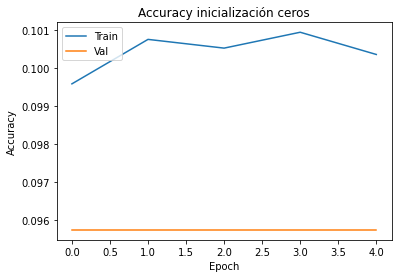

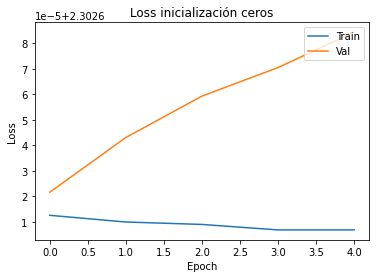

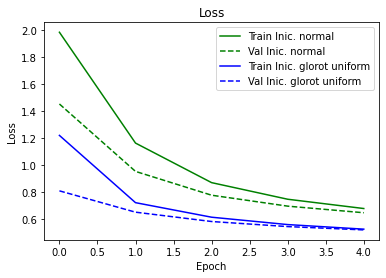

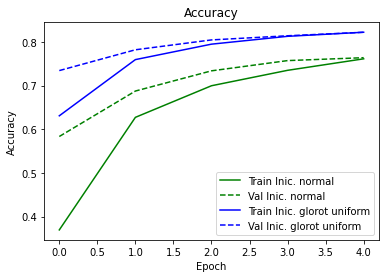

In [ ]:
plot_acc(history_ceros, title="Accuracy inicialización ceros")
plot_loss(history_ceros, title="Loss inicialización ceros")

plot_compare_losses(history_normal,
                    history_glorotUniform,
                    'Inic. normal', 'Inic. glorot uniform', 'Loss')
plot_compare_accs(history_normal,
                  history_glorotUniform,
                  'Inic. normal', 'Inic. glorot uniform', 'Accuracy')

>En primer lugar, indicar que no se investiga sobre la inicialización del bias, ya que en clase se ha visto que no tiene gran influencia en los resultados finales.
>
>Al inicializar con ceros la red no aprende, con lo que los resultados no mejoran a medida que pasan los epochs. En las dos últimas gráficas se compara la inicialización con variable aleatoria normal y con estrategia glorot uniform. En las gráficas se observa que la segunda opción presenta siempre mejores resultados tanto en accuracy como en loss, y tanto en el training como en validación. Sin embargo en las últimas epochs los resultados tienden a igualarse. 
>
>Por otro lado, la inicialización con la estrategia glorot uniform converge con más rapidez que la inicializacion con variable aleatoria normal.

## 3. Optimizadores

**Ejercicio 3 *(1.25 puntos)***: Partiendo de una red similar a la del ejercicio anterior (utilizando la mejor estrategia de inicialización observada), comparar y analizar las diferencias que se observan  al entrenar con varios de los optimizadores vistos en clase, incluyendo SGD como optimizador básico (se puede explorar el espacio de hiperparámetros de cada optimizador, aunque para optimizadores más avanzados del estilo de adam y RMSprop es buena idea dejar los valores por defecto provistos por Keras).

In [ ]:
## Tu código y comentarios de texto aquí
## Puedes incluir tantas celdas como quieras
## No olvides utilizar celdas de Markdown para texto

# Se crea una función para construiur el modelo que acepte como parámetro
# el tipo de optimizador a emplear
def modelo_optimizador(optimizador='adam'):
  model = keras.Sequential()
  model.add(Flatten())
  # Aquí ya se utiliza activación relu e inicialización por defecto
  model.add(Dense(128,activation='relu'))
  model.add(Dense(64,activation='relu'))
  model.add(Dense(10, activation='softmax'))

  model.compile(optimizer=optimizador,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  return model

# Se entrena con optimizador SGD
# Se reserva el 20% de las muestras para validación
print("Entrenamiento con optimizador SGD:")
model_sgd = modelo_optimizador(optimizador='sgd')
history_sgd=model_sgd.fit(x_train,
                          y_train,
                          validation_split=0.2,
                          batch_size=128,
                          epochs=10)

# Se entrena con optimizador Adagrad
# Se reserva el 20% de las muestras para validación
print("\nEntrenamiento con optimizador Adagrad:")
model_adagrad = modelo_optimizador(optimizador='adagrad')
history_adagrad=model_adagrad.fit(x_train,
                                  y_train,
                                  validation_split=0.2,
                                  batch_size=128,
                                  epochs=10)

# Se entrena con optimizador Rmsprop
# Se reserva el 20% de las muestras para validación
print("\nEntrenamiento con optimizador Rmsprop:")
model_rmsprop = modelo_optimizador(optimizador='rmsprop')
history_rmsprop=model_rmsprop.fit(x_train,
                                  y_train,
                                  validation_split=0.2,
                                  batch_size=128,
                                  epochs=10)

# Se entrena con optimizador Adam
# Se reserva el 20% de las muestras para validación
print("\nEntrenamiento con optimizador Adam:")
model_adam = modelo_optimizador(optimizador='adam')
history_adam=model_adam.fit(x_train,
                            y_train,
                            validation_split=0.2,
                            batch_size=128,
                            epochs=10)

Entrenamiento con optimizador SGD:
Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 1.2402 - accuracy: 0.6099 - val_loss: 0.8129 - val_accuracy: 0.7328
Epoch 2/10
375/375 [==============================] - 1s 4ms/step - loss: 0.7265 - accuracy: 0.7543 - val_loss: 0.6540 - val_accuracy: 0.7722
Epoch 3/10
375/375 [==============================] - 1s 4ms/step - loss: 0.6209 - accuracy: 0.7886 - val_loss: 0.5866 - val_accuracy: 0.7990
Epoch 4/10
375/375 [==============================] - 1s 4ms/step - loss: 0.5667 - accuracy: 0.8081 - val_loss: 0.5477 - val_accuracy: 0.8103
Epoch 5/10
375/375 [==============================] - 1s 4ms/step - loss: 0.5317 - accuracy: 0.8197 - val_loss: 0.5206 - val_accuracy: 0.8187
Epoch 6/10
375/375 [==============================] - 1s 4ms/step - loss: 0.5072 - accuracy: 0.8266 - val_loss: 0.5063 - val_accuracy: 0.8242
Epoch 7/10
375/375 [==============================] - 1s 4ms/step - loss: 0.4883 - accuracy: 0.8328 - val_loss: 0

> A continuación se comparan gráficamente los resultados obtenidos con los diferentes optimizadores:

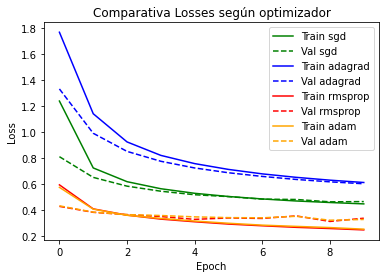

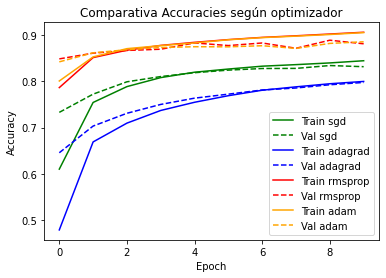

In [ ]:
plot_compare_multiple_losses([history_sgd, history_adagrad, history_rmsprop, history_adam],
                             ['sgd', 'adagrad', 'rmsprop', 'adam'],
                             title="Comparativa Losses según optimizador")

plot_compare_multiple_accs([history_sgd, history_adagrad, history_rmsprop, history_adam],
                           ['sgd', 'adagrad', 'rmsprop', 'adam'],
                           title="Comparativa Accuracies según optimizador")

>Puede observarse que el optimizador que presenta los peores resultados es el adagrad, seguido del sgd.
>
>Los otros dos optimizadores obtienen resultados bastante parecidos, aunque para el optimizador "adam" son ligeramente superiores.
>
>También se observa como en estos dos últimos optimizadores, a medida que se incrementan los epochs, los resultados en validación comienzan a alejarse marcadamene de los resultados en train. Esto puede indicar overfitting.
>
> Las velocidades de convergencia son muy parecidas con cualquiera de estos optimizadores.
>
>Para terminar con los optimizadores, se intenta hacer una búsqueda en los hiperparámetros para el SGD que mejoren los resultados , para ello se hace uso de keras tuner con la estrategia hyperband.

In [ ]:
# Se crea una función para probar los hiperparámetros
# learning rate y momentum en el optimizador SGD
def build_model_sgd_parameters(hp):
    model = keras.Sequential()
    model.add(Flatten())
    model.add(Dense(128,activation='relu'))
    model.add(Dense(64,activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(
        optimizer=keras.optimizers.SGD(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4]),
            hp.Choice('momentum',[0.0, 0.8, 0.9])),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])
    return model

# Se utiliza función hyperband para buscar los mejores hiperparámetros
tuner = kt.Hyperband(build_model_sgd_parameters,
                     objective = 'val_accuracy',
                     max_epochs = 10,
                     factor = 3,
                     directory = 'my_dir',
                     project_name = 'sgd_parameters',
                     seed=47)

# Esto se utiliza para borrar resultados parciales en pantalla
class ClearTrainingOutput(tf.keras.callbacks.Callback):
  def on_train_end(*args, **kwargs):
    IPython.display.clear_output(wait = True)

# Se hace la búsqueda de hiperparámetros reservando un 20% de las muestras 
# para validación
tuner.search(x_train,
             y_train,
             epochs = 5,
             validation_split=0.2,
             callbacks = [ClearTrainingOutput()])

# Mejores hiperparámetros
best_hps_sgd_parameters = tuner.get_best_hyperparameters(num_trials = 1)[0]

INFO:tensorflow:Oracle triggered exit


>Como se observa en la celda anterior, se obtienen los mejores resultados para:
* lr=0.0001
* momentum=0.9
>
>A continuación se comparan los resultados utilizando el optimizador SGD por defecto y SGD con estos nuevos hiperparámetros

Entrenamiento utilizando optimizador SGD con hiperparámetros
Epoch 1/10
750/750 [==============================] - 2s 3ms/step - loss: 0.6028 - accuracy: 0.7892 - val_loss: 0.4586 - val_accuracy: 0.8418
Epoch 2/10
750/750 [==============================] - 2s 3ms/step - loss: 0.4207 - accuracy: 0.8496 - val_loss: 0.4602 - val_accuracy: 0.8331
Epoch 3/10
750/750 [==============================] - 2s 3ms/step - loss: 0.3791 - accuracy: 0.8615 - val_loss: 0.4147 - val_accuracy: 0.8506
Epoch 4/10
750/750 [==============================] - 2s 3ms/step - loss: 0.3523 - accuracy: 0.8714 - val_loss: 0.3587 - val_accuracy: 0.8708
Epoch 5/10
750/750 [==============================] - 2s 3ms/step - loss: 0.3354 - accuracy: 0.8772 - val_loss: 0.3704 - val_accuracy: 0.8670
Epoch 6/10
750/750 [==============================] - 2s 3ms/step - loss: 0.3181 - accuracy: 0.8835 - val_loss: 0.3398 - val_accuracy: 0.8790
Epoch 7/10
750/750 [==============================] - 2s 3ms/step - loss: 0.3043 - accu

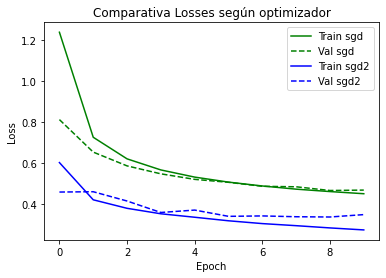

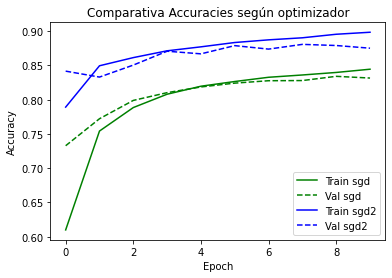

In [ ]:
model_sgd_parameters = tuner.hypermodel.build(best_hps_sgd_parameters)

print("Entrenamiento utilizando optimizador SGD con hiperparámetros")
history_sgd2 = model_sgd_parameters.fit(x_train,
                                        y_train,
                                        validation_split=0.2,
                                        batch_size=64,
                                        epochs = 10)

plot_compare_multiple_losses([history_sgd, history_sgd2],
                             ['sgd', 'sgd2'],
                             title="Comparativa Losses según optimizador")

plot_compare_multiple_accs([history_sgd, history_sgd2],
                             ['sgd', 'sgd2'],
                           title="Comparativa Accuracies según optimizador")

>Como puede observarse, los resultados obtenidos buscando los mejores hiperparámetros "sgd2" mejoran con bastante claridad a los obtenidos con el optimizador SGD por defecto.

## 4. Regularización y red final *(1.25 puntos)*

**Ejercicio 4.1**: Entrenar una red final que sea capaz de obtener una accuracy en el validation set cercana al 90%. Para ello, combinar todo lo aprendido anteriormente y utilizar técnicas de regularización para evitar overfitting. Algunos de los elementos que pueden tenerse en cuenta son los siguientes.

* Número de capas y neuronas por capa
* Optimizadores y sus parámetros
* Batch size
* Unidades de activación
* Uso de capas dropout, regularización L2, regularización L1...
* Early stopping (se puede aplicar como un callback de Keras, o se puede ver un poco "a ojo" cuándo el modelo empieza a caer en overfitting y seleccionar el número de epochs necesarias)
* Batch normalization

Si los modelos entrenados anteriormente ya se acercaban al valor requerido de accuracy, probar distintas estrategias igualmente y comentar los resultados.

Explicar brevemente la estrategia seguida y los modelos probados para obtener el modelo final, que debe verse entrenado en este Notebook. No es necesario guardar el entrenamiento de todos los modelos que se han probado, es suficiente con explicar cómo se ha llegado al modelo final.

>Para empezar se utilizan los mejores resultados obtenidos hasta ahora:
*   Unidades de activación: relu
*   Inicialización de parámetros: glorot uniform. (por defecto en keras)
* Optimizador: adam
>
>Con estos resultados y un número de epochs adecuado, la red ya supera el 85% de accuracy en validación
>
>Se prueba a mejorar distintos parámetros de la red. Se sigue la siguiente estrategia:
* En primer lugar buscar el número de capas y unidades en cada capa. Para ello se utiliza keras tuner y se realiza una búsqueda limitada a 2 o 3 capas porque resulta muy costoso buscar con más número de capas. Se obtiene la mejor topología con 3 capas de 512, 512 y 256 neuronas respectivamente.
* A continuación se buscan mejoras modificando el hiperparámetro "learning rate" del optimizador Adam. Se obtiene un lr = 0.001 como mejor opción.
* Respecto del batch_size, se prueban diferentes opciones y se observa que los resultados no varían mucho respecto de este parámetro. Sin embargo, con batch_sizes mas altos el entrenamiento es más rápido. Se puede utilizar 64 o 128 por ejemplo.
>
>Con todo esto, si se entrena la red con 20 o 30 épocas, se observa que los resultados en train y en validación empiezan a diverger a medida que aumentan los epochs. Esto puede indicar la existencia de overfitting.
>
>Sin embargo, la aplicación de técnicas de regularización no mejora los resultados. Se aplican las siguientes:
* Dropout.
* BatchNormalization.
* Regularización l1 y l2
>
>Tras todas estas estrategias, se observa que el resultado en validación no mejora demasiado. Se consiguen valores entre 0.88 y 0.89 pero no se pasa de ahí. Estos resultados parecen indicar que este tipo de redes neuronales no permiten mejorar el accuracy en validación para este dataset más allá de estos valores.
>
>Finalmente se deja el modelo que se han obtenido mejores resultados.



Epoch 1/20
750/750 [==============================] - 10s 13ms/step - loss: 0.4880 - accuracy: 0.8232 - val_loss: 0.3899 - val_accuracy: 0.8605
Epoch 2/20
750/750 [==============================] - 10s 13ms/step - loss: 0.3702 - accuracy: 0.8640 - val_loss: 0.3980 - val_accuracy: 0.8476
Epoch 3/20
750/750 [==============================] - 10s 13ms/step - loss: 0.3305 - accuracy: 0.8775 - val_loss: 0.3567 - val_accuracy: 0.8766
Epoch 4/20
750/750 [==============================] - 10s 13ms/step - loss: 0.3037 - accuracy: 0.8872 - val_loss: 0.3382 - val_accuracy: 0.8737
Epoch 5/20
750/750 [==============================] - 10s 13ms/step - loss: 0.2883 - accuracy: 0.8923 - val_loss: 0.3254 - val_accuracy: 0.8850
Epoch 6/20
750/750 [==============================] - 10s 13ms/step - loss: 0.2720 - accuracy: 0.8972 - val_loss: 0.3286 - val_accuracy: 0.8837
Epoch 7/20
750/750 [==============================] - 10s 13ms/step - loss: 0.2596 - accuracy: 0.9010 - val_loss: 0.3303 - val_accuracy:

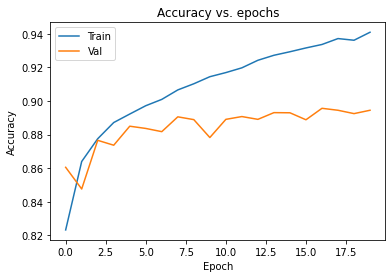

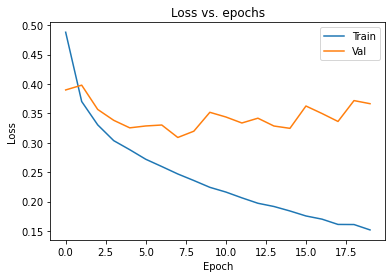

In [ ]:
def my_best_model():
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28, 28)))
  model.add(Dense(512, activation='relu'))
  model.add(Dense(512, activation='relu'))
  model.add(Dense(256, activation='relu'))
  model.add(keras.layers.Dense(10, activation='softmax'))
  model.compile(
        optimizer=keras.optimizers.Adam(0.001),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])
  return model

best_model = my_best_model()
best_history=best_model.fit(x_train,
                            y_train,
                            validation_split=0.2,
                            batch_size=64,
                            epochs=20)

plot_acc(best_history,"Accuracy vs. epochs")
plot_loss(best_history,"Loss vs. epochs")

### Evaluación del modelo en datos de test

Una vez elegido el que creemos que es nuestro mejor modelo a partir de la estimación que hemos visto en los datos de validación, es hora de utilizar los datos de test para ver cómo se comporta nuestro modelo ante nuevos datos. Si hemos hecho bien las cosas, este número debería ser parecido al valor de nuestra estimación vista en los datos de validación.

**Pregunta 4.2**. Utilizando nuestro mejor modelo, obtener la accuracy resultante en el dataset de test. Comentar este resultado.

>Se copia el mejor modelo obtenido.
>Ahora se entrena con todos los datos disponibles en training para mejorar los resultados finales.


In [ ]:
model = my_best_model()

model.fit(x_train,y_train,batch_size=64, epochs=20)
test_loss, test_acc= model.evaluate(x_test,y_test)
print("Accuracy en dataset de test: " + str(test_acc))

Epoch 1/20
938/938 [==============================] - 12s 13ms/step - loss: 0.4740 - accuracy: 0.8282
Epoch 2/20
938/938 [==============================] - 12s 13ms/step - loss: 0.3569 - accuracy: 0.8688
Epoch 3/20
938/938 [==============================] - 12s 13ms/step - loss: 0.3222 - accuracy: 0.8812
Epoch 4/20
938/938 [==============================] - 12s 12ms/step - loss: 0.2985 - accuracy: 0.8887
Epoch 5/20
938/938 [==============================] - 12s 12ms/step - loss: 0.2808 - accuracy: 0.8951
Epoch 6/20
938/938 [==============================] - 11s 12ms/step - loss: 0.2636 - accuracy: 0.9022
Epoch 7/20
938/938 [==============================] - 11s 12ms/step - loss: 0.2519 - accuracy: 0.9049
Epoch 8/20
938/938 [==============================] - 12s 12ms/step - loss: 0.2410 - accuracy: 0.9096
Epoch 9/20
938/938 [==============================] - 12s 13ms/step - loss: 0.2288 - accuracy: 0.9124
Epoch 10/20
938/938 [==============================] - 11s 12ms/step - loss: 0.216


>El resultado final obtenido en el dataset de testing es superior a 0.89. Este valor es muy parecido al encontrado en el apartado anterior en validación.
>
>A lo largo de la práctica he alcanzado resultados similares (aunque algo inferiores) con otras tipologías.
>
>Este es el mejor resultado que he conseguido obtener. Como he comentado anteriormente, he probado a aplicar varios tipos de regularizaciones y no se han obtenido mejores resultados.